# Ecommerce Churn Analysis and Prediction

<https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction>

- **Why**: The ability to predict that a particular customer is at a high risk of churning, while there is still time to do something about it, represents a huge additional potential revenue source for companies.

- **What**: Developed an insight engine to identify customers who are likely to churn and provided business solutions.

- **How**: complete end-to-end workflow for machine learning model training & selection, hyperparameter tuning, analysis, and interpretation of the results.

### Workflow

- A model is trained on customer churn history (event period for X features and performance window for target variable).
- Every month active customer base is passed onto Machine Learning Predictive Model to return the probability of churn for each customer (in business lingo, this is sometimes called a score of churn).
- The list will be sorted from highest to lowest probability value (or score) and the customer retention teams will start engaging with the customer to stop the churn, normally by offering some kind of promotion or gift card.
- Customers that have a very low probability of churn (or essentially model predicts no-churn) are happy customers. No actions are taken on them.

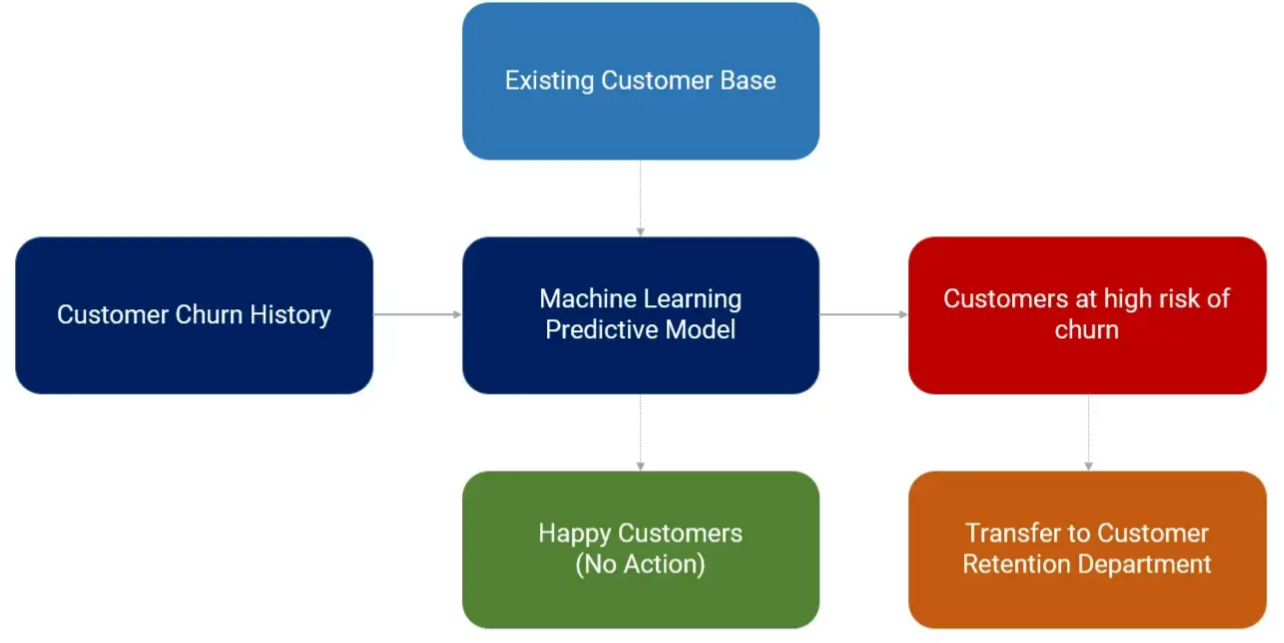

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

# metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

# from xgboost
from xgboost import XGBClassifier 

In [4]:
# pip install -U --pre pycaret
import pycaret

### Get the Data

In [111]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='Data Dict', header=1, usecols=[1,2,3])
df

Data                     Variable  \
0   E Comm                   CustomerID   
1   E Comm                        Churn   
2   E Comm                       Tenure   
3   E Comm         PreferredLoginDevice   
4   E Comm                     CityTier   
5   E Comm              WarehouseToHome   
6   E Comm         PreferredPaymentMode   
7   E Comm                       Gender   
8   E Comm               HourSpendOnApp   
9   E Comm     NumberOfDeviceRegistered   
10  E Comm             PreferedOrderCat   
11  E Comm            SatisfactionScore   
12  E Comm                MaritalStatus   
13  E Comm              NumberOfAddress   
14  E Comm                     Complain   
15  E Comm  OrderAmountHikeFromlastYear   
16  E Comm                   CouponUsed   
17  E Comm                   OrderCount   
18  E Comm            DaySinceLastOrder   
19  E Comm               CashbackAmount   

                                                      Discerption  
0                                              Unique customer ID  
1                                                      Churn Flag  
2                              Tenure of customer in organization  
3                              Preferred login device of customer  
4                                                       City tier  
5               Distance in between warehouse to home of customer  
6                            Preferred payment method of customer  
7                                              Gender of customer  
8          Number of hours spend on mobile application or website  
9   Total number of deceives is registered on particular customer  
10             Preferred order category of customer in last month  
11                      Satisfactory score of customer on service  
12                                     Marital status of customer  
13             Total number of added added on particular customer  
14                    Any complaint has been raised in last month  
15                   Percentage increases in order from last year  
16             Total number of coupon has been used in last month  
17           Total number of orders has been places in last month  
18                               Day Since last order by customer  
19                                 Average cashback in last month

In [112]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

## 1. EDA 

### 1.1 Basic Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [8]:
df.describe(include="all")

CustomerID        Churn       Tenure PreferredLoginDevice  \
count    5630.000000  5630.000000  5366.000000                 5630   
unique           NaN          NaN          NaN                    3   
top              NaN          NaN          NaN         Mobile Phone   
freq             NaN          NaN          NaN                 2765   
mean    52815.500000     0.168384    10.189899                  NaN   
std      1625.385339     0.374240     8.557241                  NaN   
min     50001.000000     0.000000     0.000000                  NaN   
25%     51408.250000     0.000000     2.000000                  NaN   
50%     52815.500000     0.000000     9.000000                  NaN   
75%     54222.750000     0.000000    16.000000                  NaN   
max     55630.000000     1.000000    61.000000                  NaN   

           CityTier  WarehouseToHome PreferredPaymentMode Gender  \
count   5630.000000      5379.000000                 5630   5630   
unique          NaN              NaN                    7      2   
top             NaN              NaN           Debit Card   Male   
freq            NaN              NaN                 2314   3384   
mean       1.654707        15.639896                  NaN    NaN   
std        0.915389         8.531475                  NaN    NaN   
min        1.000000         5.000000                  NaN    NaN   
25%        1.000000         9.000000                  NaN    NaN   
50%        1.000000        14.000000                  NaN    NaN   
75%        3.000000        20.000000                  NaN    NaN   
max        3.000000       127.000000                  NaN    NaN   

        HourSpendOnApp  NumberOfDeviceRegistered    PreferedOrderCat  \
count      5375.000000               5630.000000                5630   
unique             NaN                       NaN                   6   
top                NaN                       NaN  Laptop & Accessory   
freq               NaN                       NaN                2050   
mean          2.931535                  3.688988                 NaN   
std           0.721926                  1.023999                 NaN   
min           0.000000                  1.000000                 NaN   
25%           2.000000                  3.000000                 NaN   
50%           3.000000                  4.000000                 NaN   
75%           3.000000                  4.000000                 NaN   
max           5.000000                  6.000000                 NaN   

        SatisfactionScore MaritalStatus  NumberOfAddress     Complain  \
count         5630.000000          5630      5630.000000  5630.000000   
unique                NaN             3              NaN          NaN   
top                   NaN       Married              NaN          NaN   
freq                  NaN          2986              NaN          NaN   
mean             3.066785           NaN         4.214032     0.284902   
std              1.380194           NaN         2.583586     0.451408   
min              1.000000           NaN         1.000000     0.000000   
25%              2.000000           NaN         2.000000     0.000000   
50%              3.000000           NaN         3.000000     0.000000   
75%              4.000000           NaN         6.000000     1.000000   
max              5.000000           NaN        22.000000     1.000000   

        OrderAmountHikeFromlastYear   CouponUsed   OrderCount  \
count                   5365.000000  5374.000000  5372.000000   
unique                          NaN          NaN          NaN   
top                             NaN          NaN          NaN   
freq                            NaN          NaN          NaN   
mean                      15.707922     1.751023     3.008004   
std                        3.675485     1.894621     2.939680   
min                       11.000000     0.000000     1.000000   
25%                       13.000000     1.000000     1.000000   
50%          

#### Churn Rate and Gender Distribution

In [9]:
# creat lables (churn:c; gender:g)
c_labels = ['No', 'Yes']
g_labels = ['Male', 'Female']

# create subplots using 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, 
                    specs=[[{'type':'domain'}, {'type':'domain'}]])
# go.Pie
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"), 1, 1)
fig.add_trace(go.Pie(labels=g_labels, values=df['Gender'].value_counts(), name="Gender"), 1, 2)

# create a donut-like pie chart using 'hole'
fig.update_traces(hole=.5, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Churn and Gender Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Churn', x=0.185, y=0.5, font_size=20, showarrow=False),
                 dict(text='Gender', x=0.83, y=0.5, font_size=20, showarrow=False)])
fig.show()

#### More details about Male and Female Churn

In [10]:
df["Churn"][df["Churn"]==0].groupby(by=df["Gender"]).count()

Gender
Female    1898
Male      2784
Name: Churn, dtype: int64

In [11]:
df["Churn"][df["Churn"]==1].groupby(by=df["Gender"]).count()

Gender
Female    348
Male      600
Name: Churn, dtype: int64

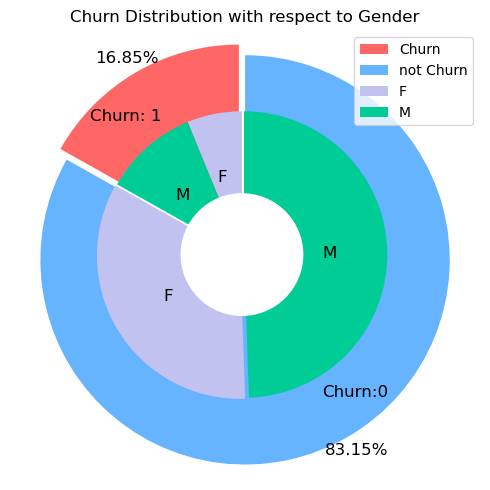

In [54]:
plt.figure(figsize=(5, 5))
labels =["Churn: 1","Churn:0"]
values = [948,4678]  # total number of female churn and male churn
labels_gender = ["F","M","F","M"]
sizes_gender = [348,600, 1896,2782]

# color and size selection 
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#00cc96', '#c2c2f0','#00cc96']
explode = (0.3,0.3) 
explode_gender = (0.0,0.0,0.1,0.1)
textprops = {"fontsize":12}

#Plot pie
plt.pie(values, labels=labels,autopct='%1.2f%%',pctdistance=1.08, labeldistance=0.75,colors=colors, 
        startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True)

plt.pie(sizes_gender,labels=labels_gender,labeldistance=0.55, colors=colors_gender,startangle=90, 
        explode=explode_gender,radius=7, textprops =textprops, counterclock = True)

#Draw circle
centre_circle = plt.Circle((0,0),3,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# adding title
plt.title('Churn Distribution with respect to Gender', fontsize=12, y=1)
gender_labels =['Churn','not Churn',"F","M"]
plt.legend(gender_labels,loc=1)

# show plot 
plt.axis('equal')
plt.tight_layout()
plt.show()

### 1.2 Missing data

In [55]:
number_missing_value = df.isnull().sum()
number_missing_value

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [56]:
percent_missing_value = df.isnull().sum() / len(df) *100 
percent_missing_value

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

<AxesSubplot:>

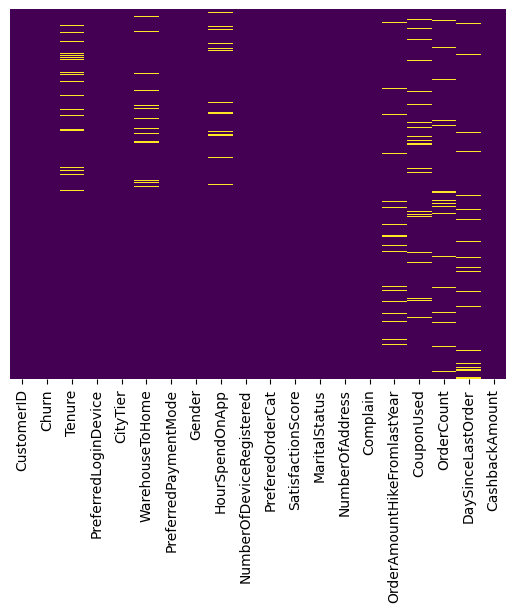

In [57]:
#using sns to plot the missing values in all columns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

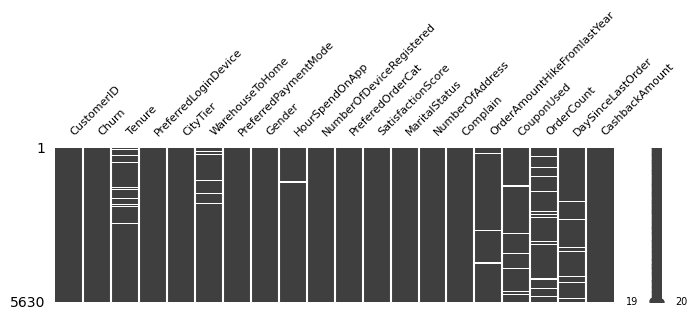

In [58]:
#using msno to plot the missing values in all columns
msno.matrix(df,figsize=(8,2), fontsize=8)

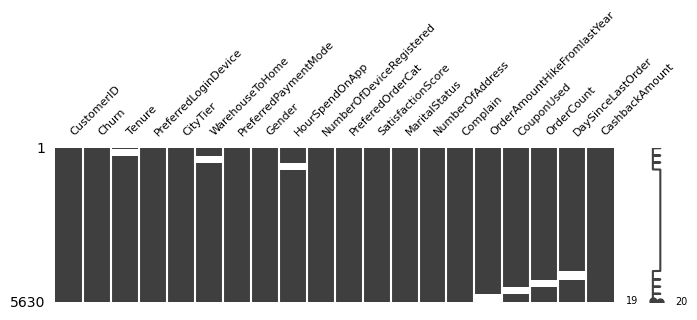

In [19]:
# Plotting the sorted values in missingness matrix
msno.matrix(df.sort_values(by='CashbackAmount'),figsize=(8,2), fontsize=8)
plt.show()

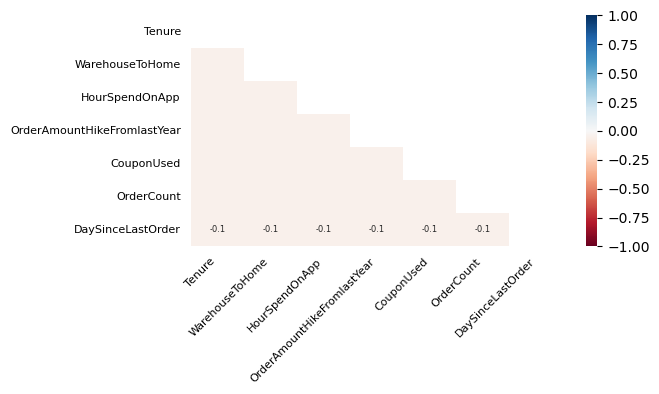

In [59]:
msno.heatmap(df, figsize=(6,3),fontsize=8)
plt.show()

### 1.3 Outlier

In [60]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

Text(0, 0.5, 'Values')

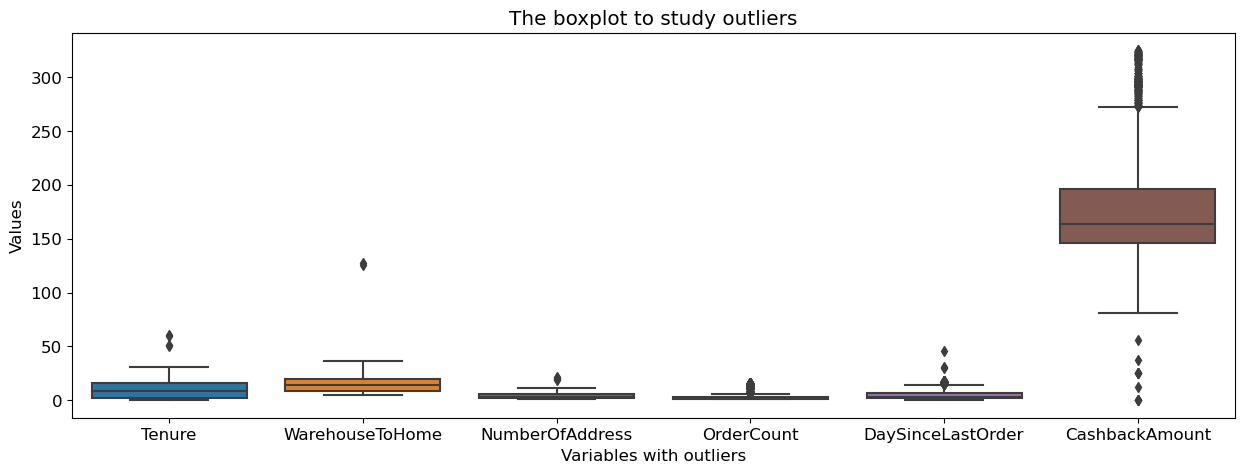

In [61]:
df_outlier = df[['Tenure','WarehouseToHome', 'NumberOfAddress',
              'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']]
plt.figure(figsize=(15,5))
plt.rcParams['font.size'] = 12
sns.boxplot(data=df_outlier)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables with outliers')
plt.ylabel('Values')

### 1.4 Data Processing and Visualizing

#### Remove tenure outliers 

In [113]:
df[np.isnan(df['Tenure'])]

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
1          50002      1     NaN                Phone         1   
2          50003      1     NaN                Phone         1   
6          50007      1     NaN                Phone         3   
7          50008      1     NaN                Phone         1   
9          50010      1     NaN                Phone         1   
...          ...    ...     ...                  ...       ...   
2756       52757      0     NaN                Phone         2   
2760       52761      0     NaN             Computer         1   
2773       52774      0     NaN                Phone         3   
2783       52784      1     NaN             Computer         3   
2802       52803      0     NaN         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
1                 8.0                  UPI    Male             3.0   
2                30.0           Debit Card    Male             2.0   
6                11.0     Cash on Delivery    Male             2.0   
7                 6.0                   CC    Male             3.0   
9                31.0           Debit Card    Male             2.0   
...               ...                  ...     ...             ...   
2756              8.0                  UPI  Female             2.0   
2760              7.0                   CC    Male             2.0   
2773              7.0                   CC    Male             3.0   
2783             15.0             E wallet    Male             2.0   
2802              8.0                   CC  Female             3.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
1                            4              Mobile                  3   
2                            4              Mobile                  3   
6                            3  Laptop & Accessory                  2   
7                            3              Mobile                  2   
9                            5              Mobile                  3   
...                        ...                 ...                ...   
2756                         3              Mobile                  4   
2760                         4              Mobile                  3   
2773                         4              Mobile                  4   
2783                         3        Mobile Phone                  5   
2802                         3              Mobile                  3   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
1           Single                7         1                         15.0   
2           Single                6         1                         14.0   
6         Divorced                4         0                         14.0   
7         Divorced                3         1                         16.0   
9           Single                2         0                         12.0   
...            ...              ...       ...                          ...   
2756       Married                5         0                         14.0   
2760       Married                2         0                         12.0   
2773       Married                1         0                         14.0   
2783       Married                2         0                         19.0   
2802       Married                3         0                         14.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
1            0.0         1.0                0.0          120.90  
2            0.0         1.0                3.0          120.28  
6            0.0         1.0                0.0          120.86  
7            2.0         2.0                0.0          122.93  
9            1.0         1.0                1.0          122.93  
...          ...         ...                ...             ...  
2756         0.0         1.0                2.0          121.87  
2760         0.0         1.0  

In [114]:
df[df['Tenure']>31].index

Int64Index([928, 2719, 3743, 5534], dtype='int64')

In [115]:
df.drop(labels=df[df['Tenure'] > 31].index, axis=0, inplace=True)

#### Preferred payment model

In [116]:
df.PreferredPaymentMode.value_counts()

Debit Card          2310
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

In [118]:
df.PreferredPaymentMode = df.PreferredPaymentMode.apply(lambda x: x.replace('CC', 'Credit Card'))
df.PreferredPaymentMode = df.PreferredPaymentMode.apply(lambda x: x.replace('COD', 'Cash on Delivery'))

In [119]:
labels = df['PreferredPaymentMode'].unique()
values = df['PreferredPaymentMode'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)], )
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

array([[<AxesSubplot:title={'center':'Churn'}>,
        <AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'CityTier'}>,
        <AxesSubplot:title={'center':'WarehouseToHome'}>],
       [<AxesSubplot:title={'center':'HourSpendOnApp'}>,
        <AxesSubplot:title={'center':'NumberOfDeviceRegistered'}>,
        <AxesSubplot:title={'center':'SatisfactionScore'}>,
        <AxesSubplot:title={'center':'NumberOfAddress'}>],
       [<AxesSubplot:title={'center':'Complain'}>,
        <AxesSubplot:title={'center':'OrderAmountHikeFromlastYear'}>,
        <AxesSubplot:title={'center':'CouponUsed'}>,
        <AxesSubplot:title={'center':'OrderCount'}>],
       [<AxesSubplot:title={'center':'DaySinceLastOrder'}>,
        <AxesSubplot:title={'center':'CashbackAmount'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

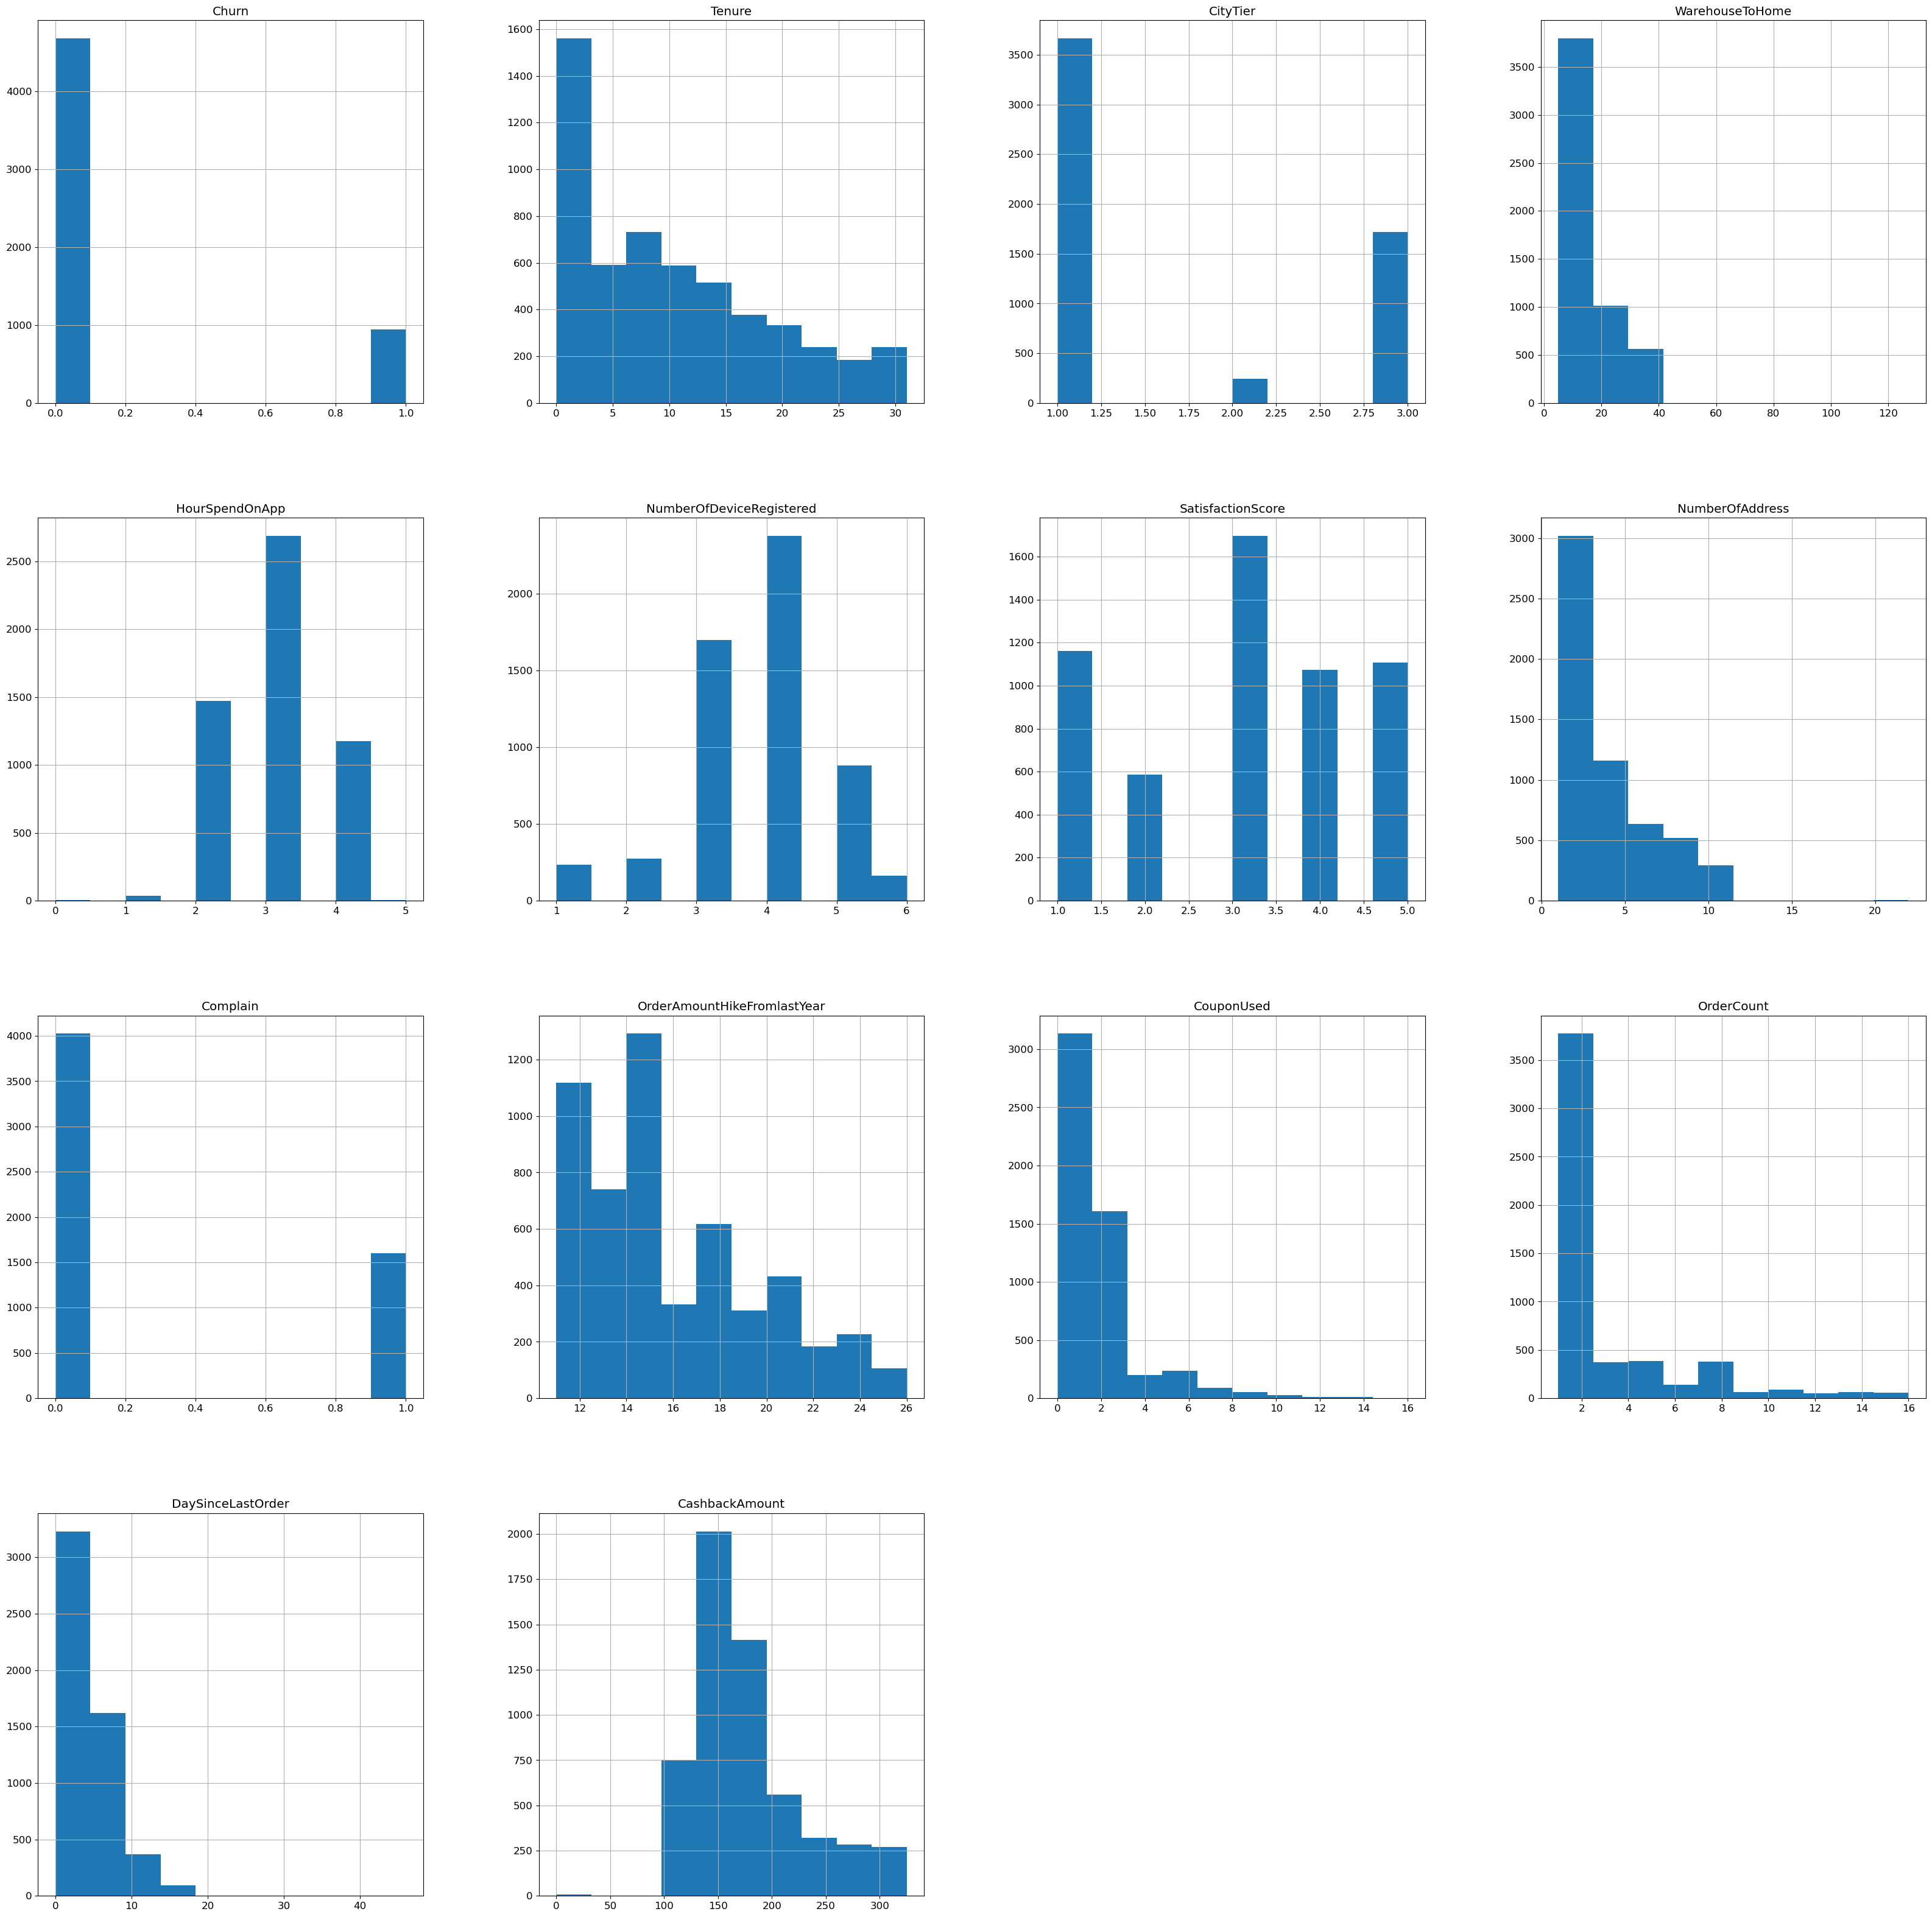

In [70]:
num, cate =[], []
for i in df.drop('CustomerID',axis=1).columns:
    if df[i].dtype=='object':
        cate.append(i)
    else:
        num.append(i)
df[num].hist(figsize=(40,40))

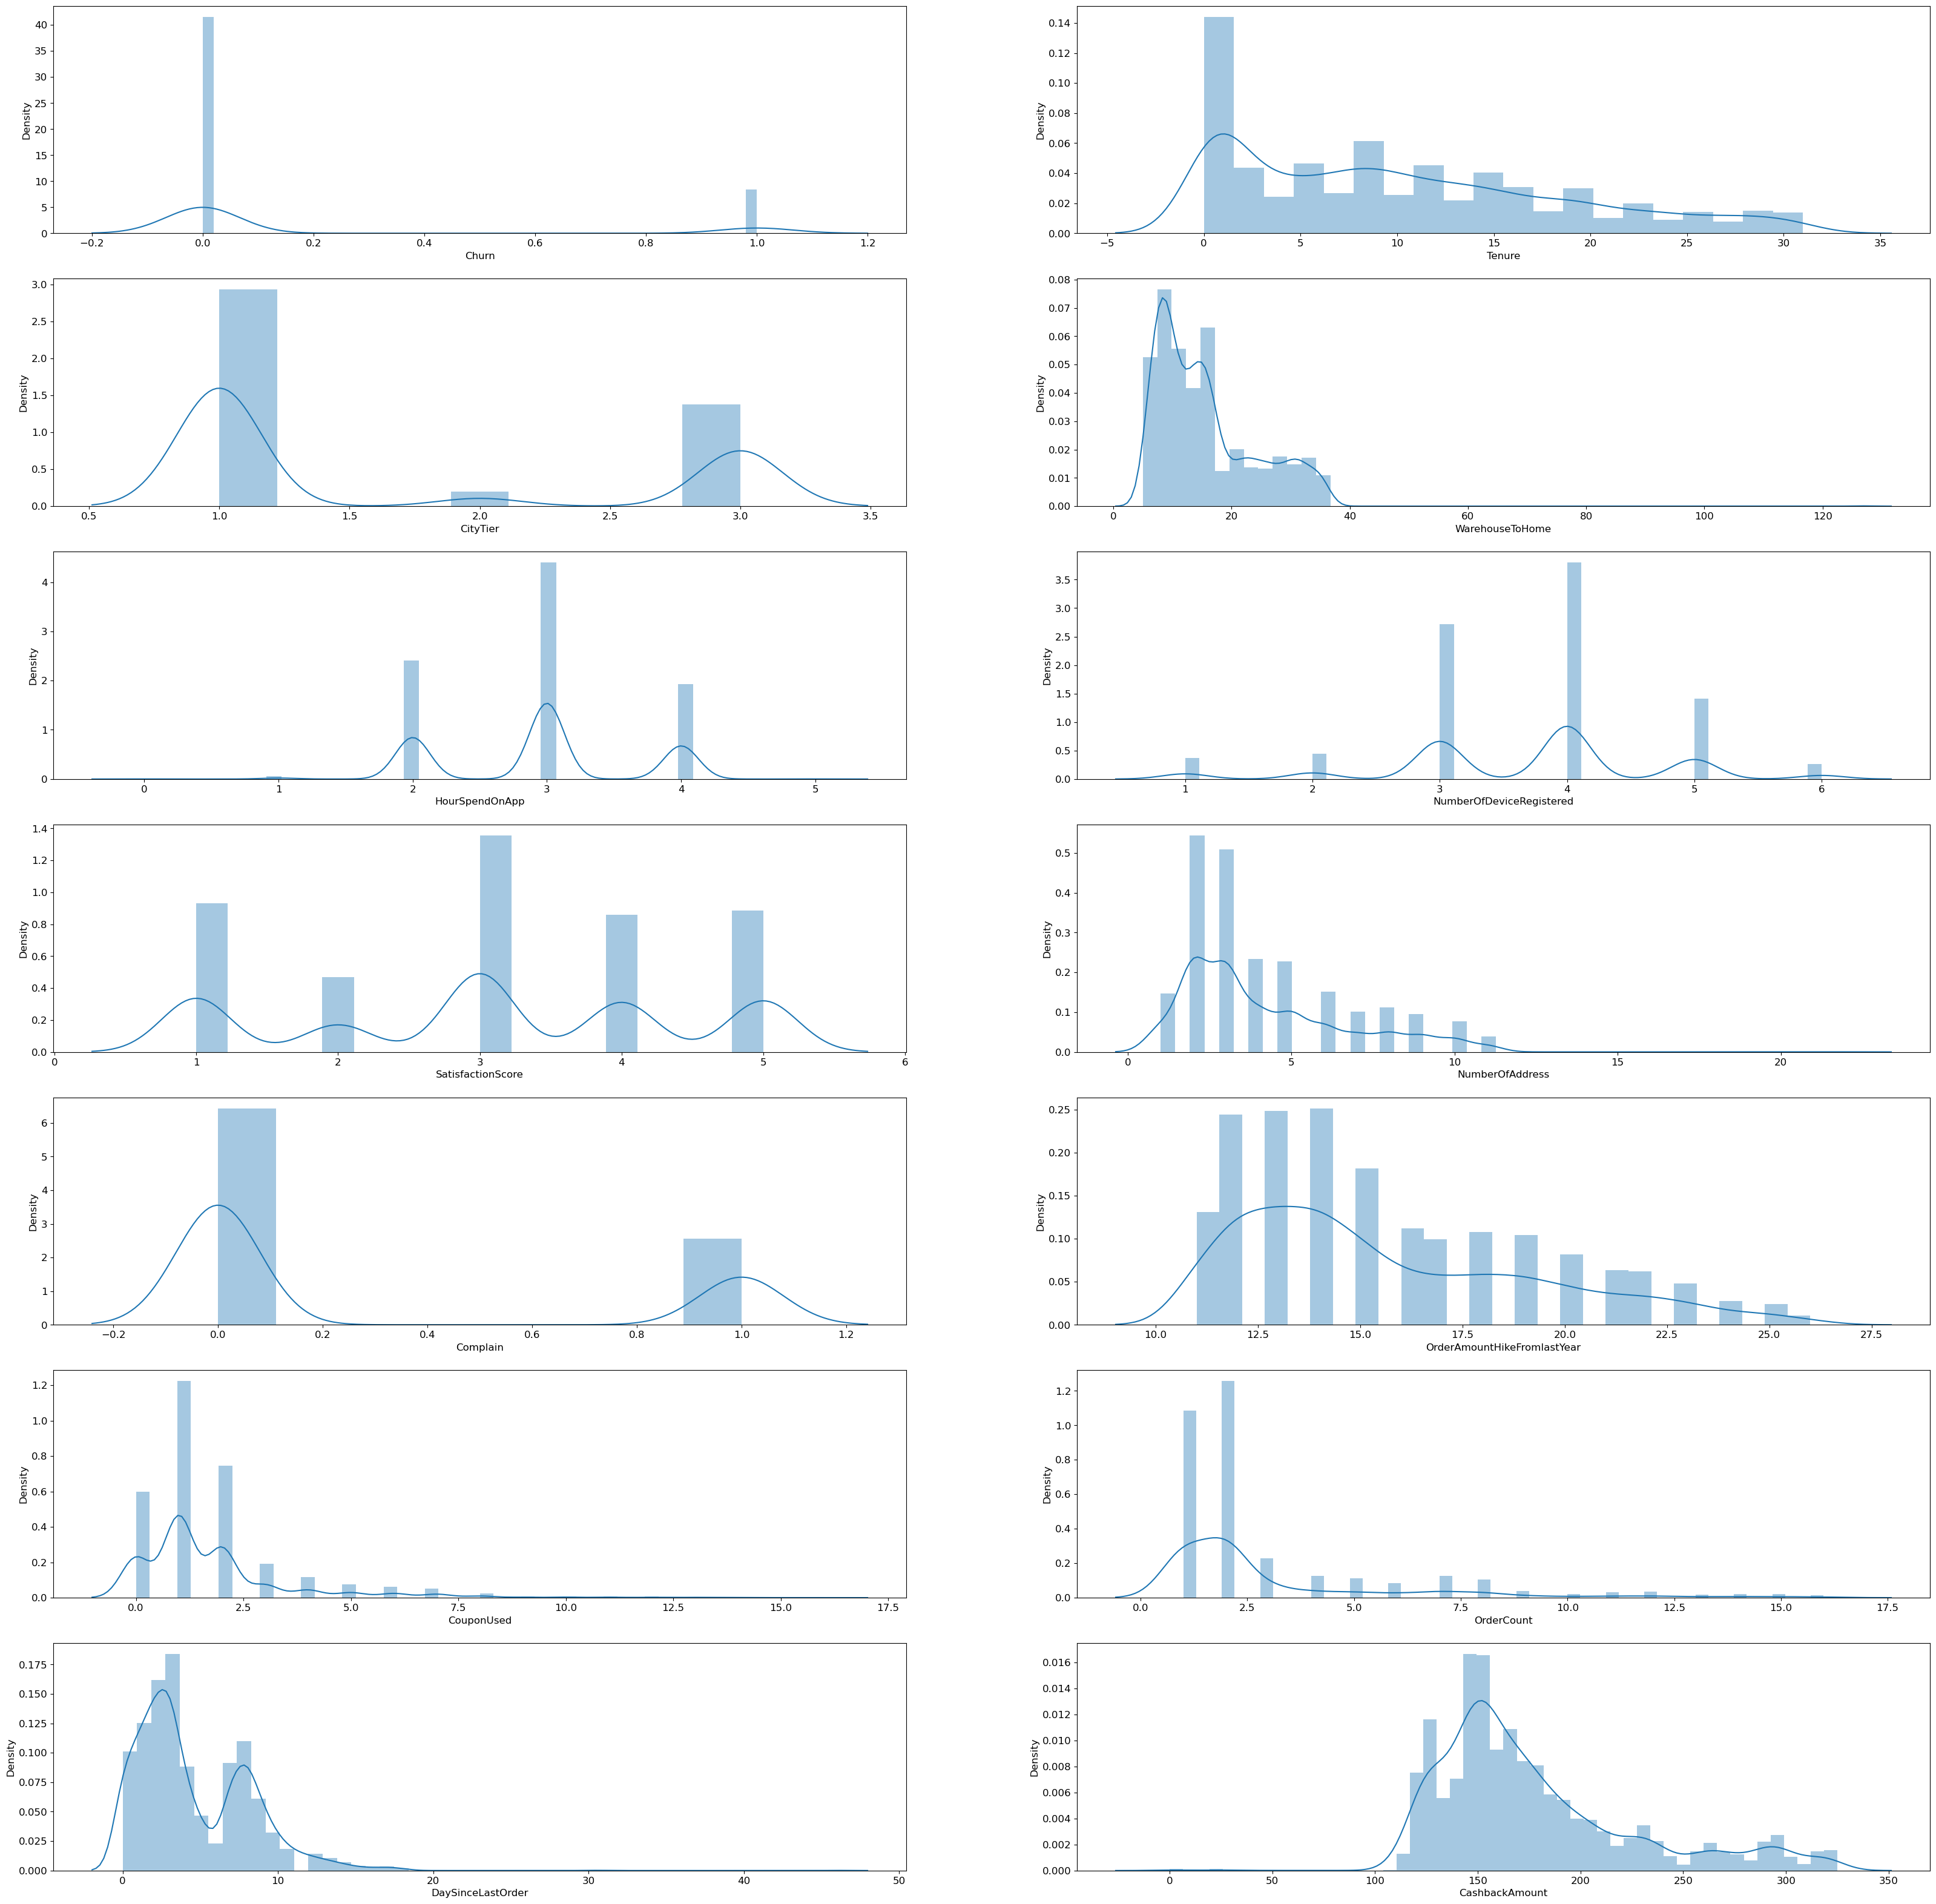

In [74]:
fig, ax = plt.subplots(7, 2, figsize=(40, 40))
for i, subplot in zip(num, ax.flatten()):
    sns.distplot(df[i], ax=subplot)

In [75]:
# Analyzing CashbackAmount, City and Tenure
fig = px.scatter(x=df['Tenure'], y=df['CashbackAmount'], 
                 color = df['Churn'], template = 'presentation', 
                 opacity = 0.5, facet_col = df['CityTier'], 
                 title = 'Customer Churn by Tenure, Cashback_Amount, and City_Tier',
                 labels = {'x' : 'Customer Tenure', 'y' : 'Cashback Amount'})               
fig.show()

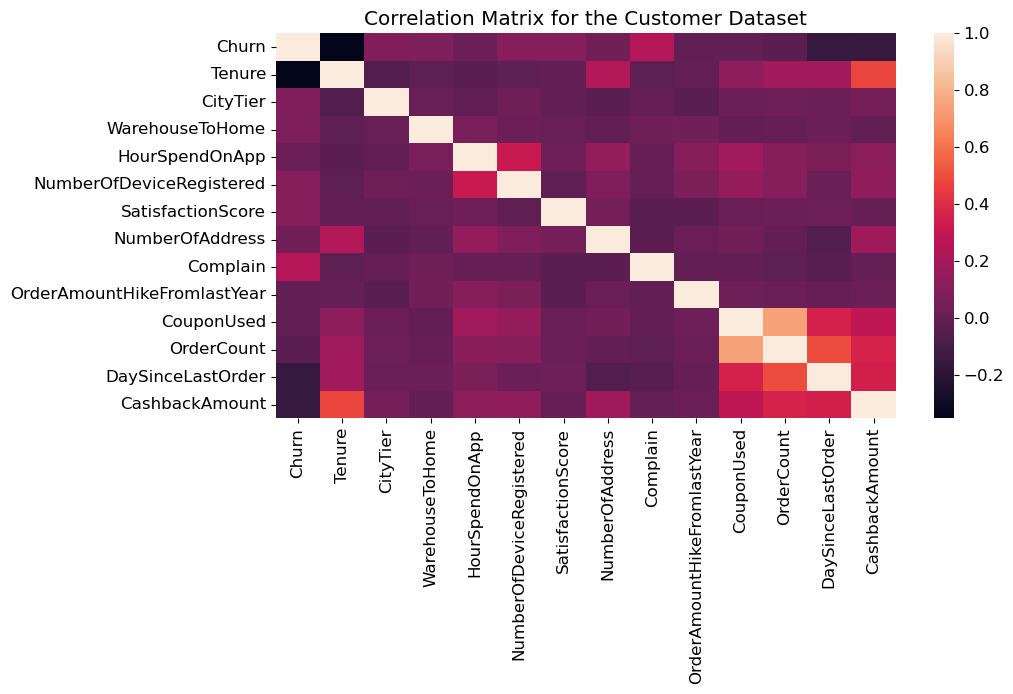

In [76]:
plt.figure(figsize = (10,5))
sns.heatmap(df.drop('CustomerID',axis=1).corr(), annot = False)
plt.title('Correlation Matrix for the Customer Dataset')
plt.show()

#### Applied PyCaret to process data and select the model

In [77]:
from pycaret.classification import *
s = setup(df, target = 'Churn', ignore_features = ['customerID'])

In [79]:
eda(display_format = 'bokeh')

Shape of your Data Set loaded: (5626, 33)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


    32 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Binary_Classification problem #####################
Number of variables = 32 exceeds limit, finding top 30 variables through XGBoost
    No categorical feature reduction done. All 19 Categorical vars selected 
    Removing correlated variables from 13 numerics using SULO method
Selecting all (13) variables since none of them are highly correlated...
    Adding 19 categorical variables to reduced numeric variables  of 13
############## F E A T U R E   S E L E C T I O N  ####################
Current number of predictors = 32 
    Finding Important Features using Boosted Trees algorithm...
        using 32 variables...
        using 26 variables...
        using 20 variables...
        using 14 variables...
        using 8 variables...
        using 2 variables...
Found 20 important features
##############################################################

    20 Predictors classified...
    No variables removed since no ID or low-information variables found in data
    List of variables removed: []
   Total columns > 30, too numerous to print.


Row
    [0] WidgetBox
        [0] Select(name='y', options=['Tenure', 'DaySinceLastOr...], value='Tenure')
    [1] ParamFunction(function)

Row
    [0] WidgetBox
        [0] Select(name='X-Axis', options=['Tenure', 'DaySinceLastOr...], value='Tenure')
        [1] Select(name='Y-Axis', options=['Tenure', 'DaySinceLastOr...], value='DaySinceLastOrder')
        [2] Select(name='Color', options=['None', 'Churn'], value='None')
    [1] ParamFunction(function)

Column
    [0] Row
        [0] HoloViews(DynamicMap)
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), options=['Complain', 'PreferedOrde...], value='Complain', width=250)
            [1] VSpacer()

Column
    [0] Row
        [0] HoloViews(DynamicMap)
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), options=['Tenure', 'NumberOfAddres...], value='Tenure', width=250)
            [1] VSpacer()

HoloViews(DynamicMap)

HoloViews(Layout)

No date vars could be found in data set


HoloViews(Overlay)

Row
    [0] WidgetBox
        [0] Select(name='X-Axis', options=['Complain', 'PreferedOrde...], value='Complain')
        [1] Select(name='Y-Axis', options=['Tenure', 'DaySinceLastOr...], value='Tenure')
    [1] ParamFunction(function)

Time to run AutoViz (in seconds) = 4


In [82]:
# compare all models
best_model = compare_models(sort='AUC')

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [83]:
print(best_model)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=5761, verbose=0, warm_start=False)


In [84]:
# tune best model
tuned_best_model = tune_model(best_model)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


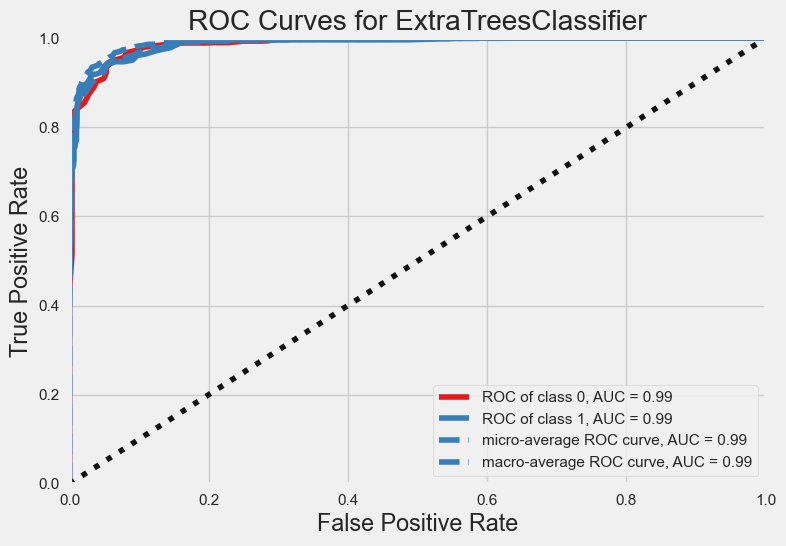

In [85]:
# AUC Plot
plot_model(tuned_best_model, plot = 'auc')

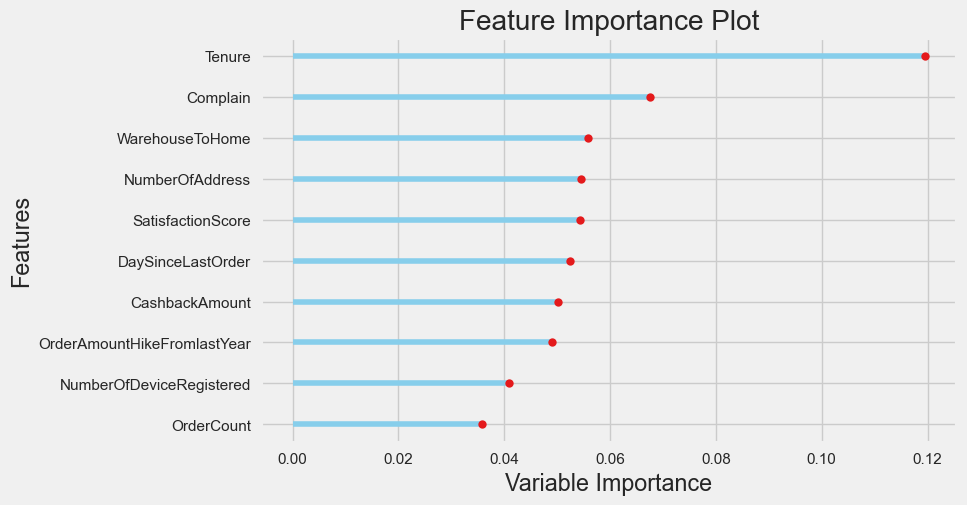

In [86]:
# Feature Importance Plot
plot_model(tuned_best_model, plot = 'feature')

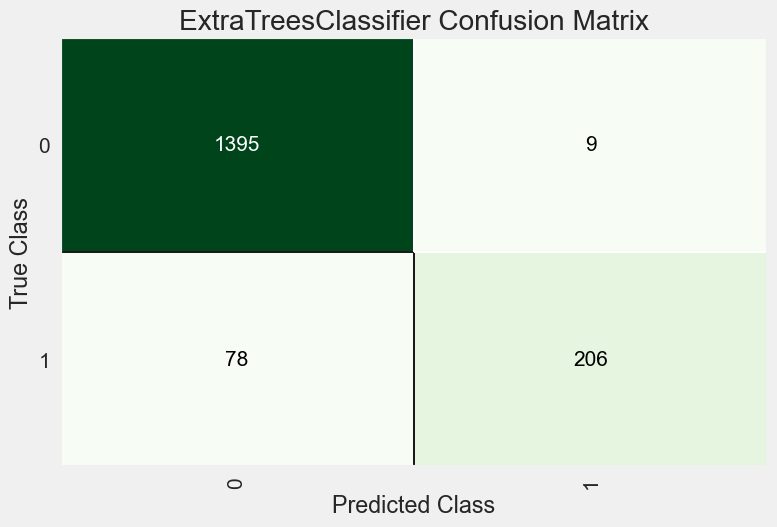

In [87]:
# Confusion Matrix
plot_model(tuned_best_model, plot = 'confusion_matrix')

- However, AUC or any other out-of-the-box classification metric (Accuracy, Recall, Precision, F1, Kappa, etc.) is not a business-smart metric. It does not take into account the risk and reward proposition.  

- In order to maximize the business value, we should train, select, and optimize models using business metrics instead of considering only conventional metrics like AUC or Recall. Thus, we add a custom metric to further evaluate the models.

Use the following assumptions (should with the ecommerce company):
- a voucher of \$100 will be offered to all the customers identified as churn (True Positive + False Positive);
- If we are able to stop the churn, the company will gain $1,000 in customer lifetime value.

Using these assumptions and the confusion matrix, we can calculate profits based on different models.

In [88]:
# create a custom function
def calculate_profit(y, y_pred):
    # tp:True Positive
    tp = np.where((y_pred==1) & (y==1), (1000-100), 0)
    # fp: False Positive
    fp = np.where((y_pred==1) & (y==0), -100, 0)
    return np.sum([tp,fp])

In [89]:
# add metric to PyCaret
add_metric('profit', 'Profit', calculate_profit)

Name                                                            Profit
Display Name                                                    Profit
Score Function       <function calculate_profit at 0x000002377803AAF0>
Scorer                                   make_scorer(calculate_profit)
Target                                                            pred
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: profit, dtype: object

In [90]:
# compare all models
best_model = compare_models(sort='Profit')

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [91]:
tuned_best_model_new = tune_model(best_model)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


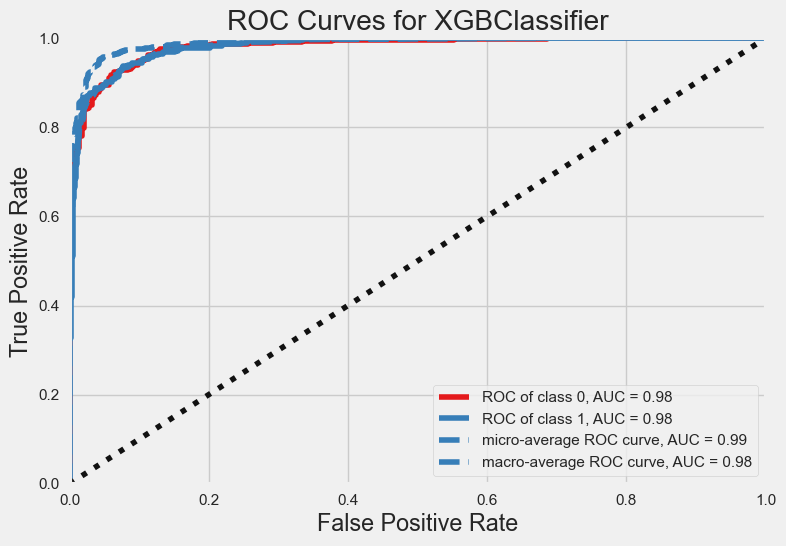

In [66]:
plot_model(tuned_best_model_new, plot = 'auc')

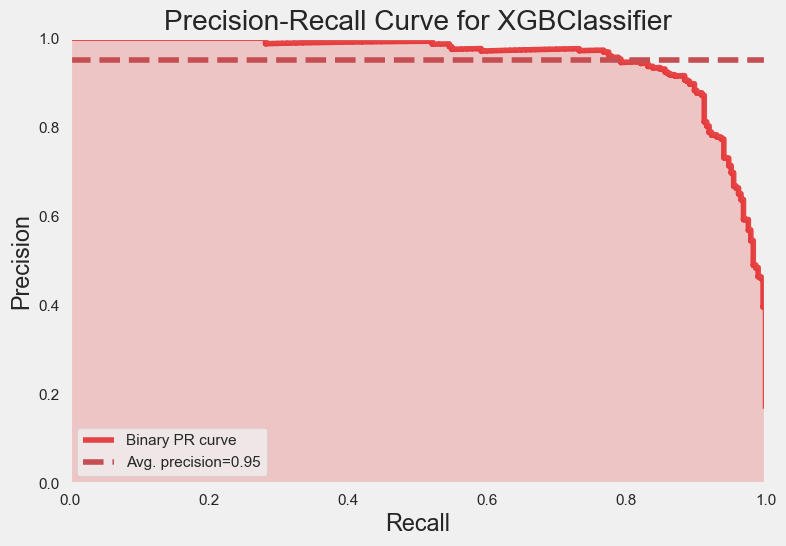

In [93]:
plot_model(tuned_best_model_new, plot = 'pr')

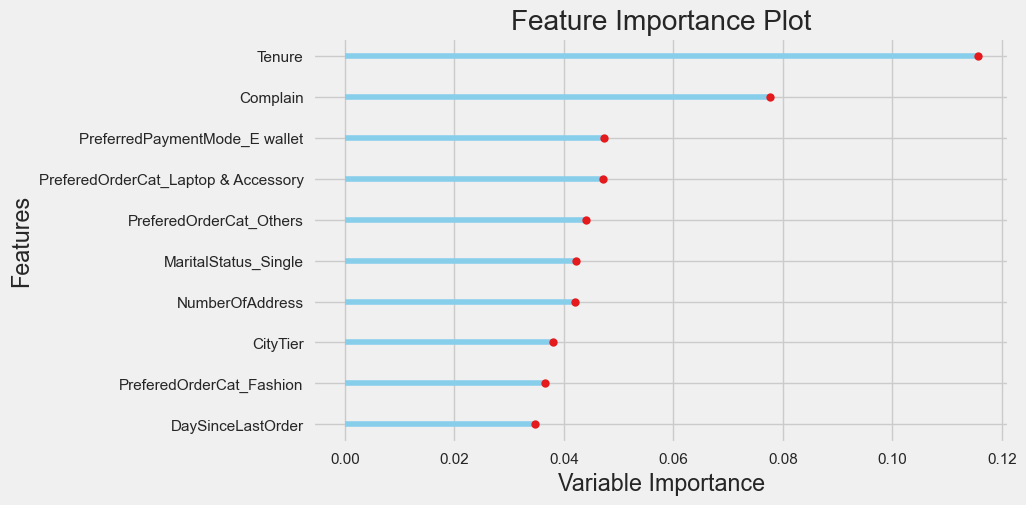

In [95]:
plot_model(tuned_best_model_new, plot = 'feature')

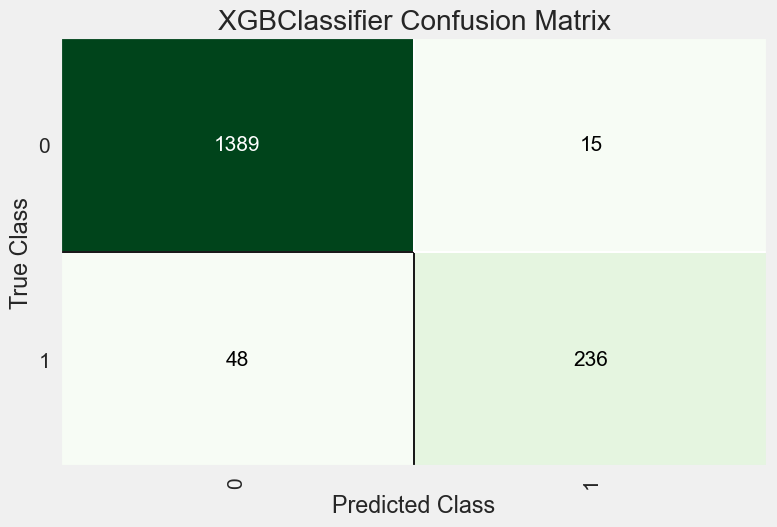

In [96]:
plot_model(tuned_best_model_new, plot = 'confusion_matrix')

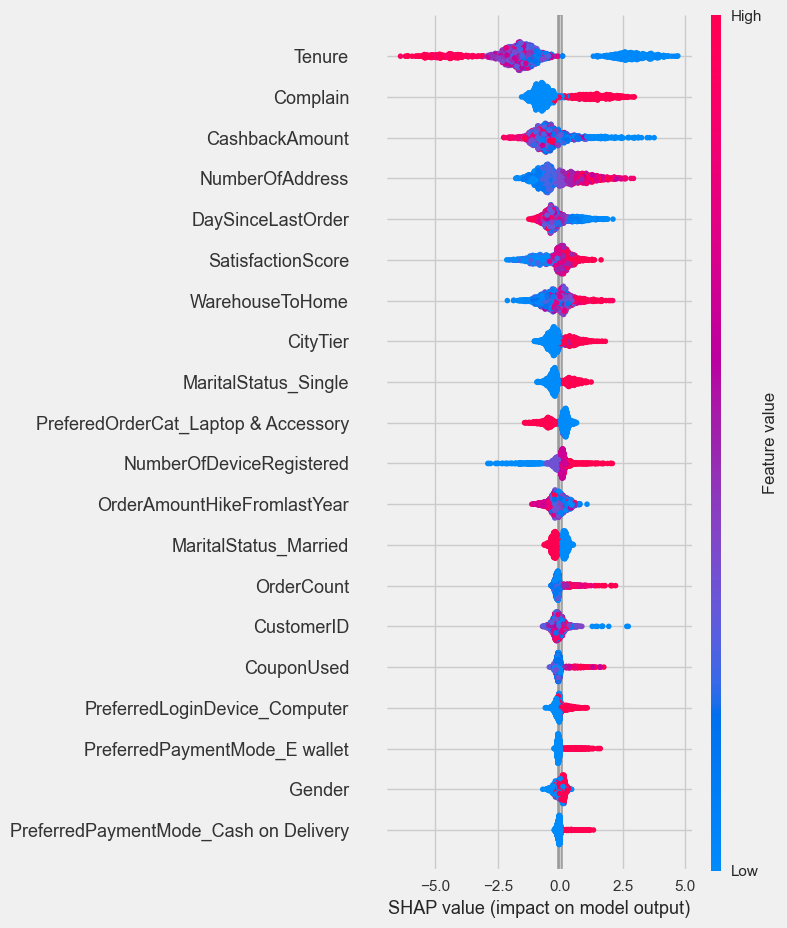

In [97]:
interpret_model(tuned_best_model_new)

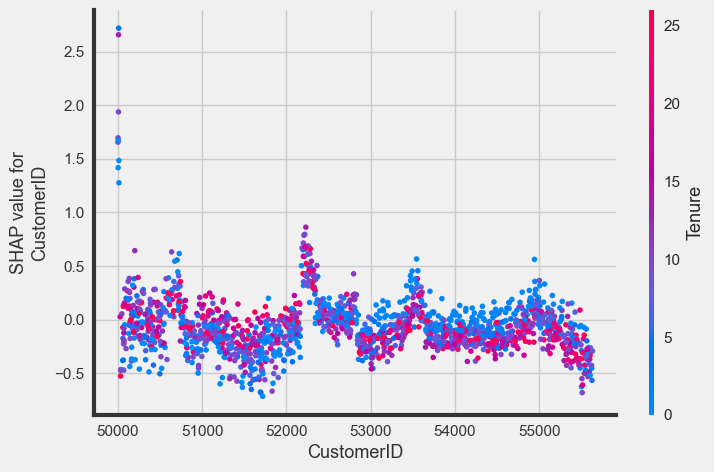

In [98]:
interpret_model(tuned_best_model_new, plot = 'correlation')

In [99]:
interpret_model(tuned_best_model_new, plot='reason', observation=0)

In [126]:
predict_model(tuned_best_model_new)

CustomerID  Tenure  PreferredLoginDevice_Computer  \
3938     54764.0    19.0                            0.0   
3939     55127.0    21.0                            0.0   
3940     53012.0     5.0                            0.0   
3941     55465.0    14.0                            0.0   
3942     53963.0    12.0                            0.0   
...          ...     ...                            ...   
5621     54872.0     1.0                            0.0   
5622     52740.0     5.0                            0.0   
5623     52506.0    18.0                            0.0   
5624     51448.0     0.0                            1.0   
5625     53429.0    13.0                            0.0   

      PreferredLoginDevice_Mobile Phone  PreferredLoginDevice_Phone  CityTier  \
3938                                0.0                         1.0       1.0   
3939                                1.0                         0.0       1.0   
3940                                1.0                         0.0       3.0   
3941                                1.0                         0.0       1.0   
3942                                1.0                         0.0       1.0   
...                                 ...                         ...       ...   
5621                                0.0                         1.0       1.0   
5622                                1.0                         0.0       1.0   
5623                                1.0                         0.0       1.0   
5624                                0.0                         0.0       1.0   
5625                                1.0                         0.0       1.0   

      WarehouseToHome  PreferredPaymentMode_Credit Card  \
3938              9.0                               0.0   
3939             14.0                               1.0   
3940             14.0                               0.0   
3941             19.0                               0.0   
3942             13.0                               0.0   
...               ...                               ...   
5621             17.0                               0.0   
5622             11.0                               0.0   
5623              8.0                               0.0   
5624             12.0                               0.0   
5625              7.0                               0.0   

      PreferredPaymentMode_Cash on Delivery  PreferredPaymentMode_Debit Card  \
3938                                    0.0                              1.0   
3939                                    0.0                              0.0   
3940                                    0.0                              0.0   
3941                                    0.0                              1.0   
3942                                    0.0                              0.0   
...                                     ...                              ...   
5621                                    0.0                              1.0   
5622                                    0.0                              1.0   
5623                                    0.0                              0.0   
5624                                    0.0                              1.0   
5625                                    0.0                              1.0   

      ...  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  CouponUsed  \
3938  ...              3.0       0.0                         15.0         2.0   
3939  ...              9.0       1.0                         15.0         2.0   
3940  ...              6.0       0.0                         13.0         1.0   
3941  ...              4.0       0.0                         13.0         2.0   
3942  ...              3.0       0.0                         12.0         1.0   
...   ...              ...       ...                          ...         ...   
5621  ...              8.0       1.0                         21.0         2.0   
5622  

In [81]:
# xgboost_model = create_model('xgboost')

In [102]:
# model deployment
dashboard(tuned_best_model_new)

Detected XGBClassifier model: Changing class type to XGBClassifierExplainer...
Note: model_output=='probability'. For XGBClassifier shap values normally get calculated against X_background, but paramater X_background=None, so using X instead
Generating self.shap_explainer = shap.TreeExplainer(model, X, model_output='probability', feature_perturbation='interventional')...
Note: Shap interaction values will not be available. If shap values in probability space are not necessary you can pass model_output='logodds' to get shap values in logodds without the need for a background dataset and also working shap interaction values...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
Generating layout...
Calculating shap values...
Calculating predicti

 * Running on all addresses.
 * Running on http://192.168.4.75:8050/ (Press CTRL+C to quit)
192.168.4.75 - - [04/Jan/2023 18:52:12] "GET / HTTP/1.1" 200 -
192.168.4.75 - - [04/Jan/2023 18:52:12] "GET /_dash-layout HTTP/1.1" 200 -
192.168.4.75 - - [04/Jan/2023 18:52:12] "GET /_dash-dependencies HTTP/1.1" 200 -
192.168.4.75 - - [04/Jan/2023 18:52:13] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
192.168.4.75 - - [04/Jan/2023 18:52:13] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
192.168.4.75 - - [04/Jan/2023 18:52:13] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
192.168.4.75 - - [04/Jan/2023 18:52:14] "POST /_dash-update-component HTTP/1.1" 204 -
192.168.4.75 - - [04/Jan/2023 18:52:14] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.4.75 - - [04/Jan/2023 18:52:14] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.4.75 - - [04/Jan/2023 18:52:14] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.4.75

192.168.4.75 - - [04/Jan/2023 18:52:18] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.4.75 - - [04/Jan/2023 18:52:18] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.4.75 - - [04/Jan/2023 18:52:18] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.4.75 - - [04/Jan/2023 18:52:18] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.4.75 - - [04/Jan/2023 18:52:18] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.4.75 - - [04/Jan/2023 18:52:18] "POST /_dash-update-component HTTP/1.1" 204 -
192.168.4.75 - - [04/Jan/2023 18:52:18] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.4.75 - - [04/Jan/2023 18:52:18] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.4.75 - - [04/Jan/2023 18:52:18] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.4.75 - - [04/Jan/2023 18:52:18] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.4.75 - - [04/Jan/2023 18:52:19] "POST /_dash-update-component HTTP/1.1" 204 -
192.168.4.75 - - [04/Jan/2023 18:52:19] "POST /_dash-u

192.168.4.75 - - [04/Jan/2023 18:53:41] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.4.75 - - [04/Jan/2023 18:53:41] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.4.75 - - [04/Jan/2023 18:53:41] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.4.75 - - [04/Jan/2023 18:53:41] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.4.75 - - [04/Jan/2023 18:53:41] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.4.75 - - [04/Jan/2023 18:53:42] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.4.75 - - [04/Jan/2023 18:53:42] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.4.75 - - [04/Jan/2023 18:53:42] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.4.75 - - [04/Jan/2023 18:53:42] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.4.75 - - [04/Jan/2023 18:53:42] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.4.75 - - [04/Jan/2023 18:53:42] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.4.75 - - [04/Jan/2023 18:53:42] "POST /_dash-u

192.168.4.75 - - [04/Jan/2023 18:55:43] "POST /_dash-update-component HTTP/1.1" 200 -


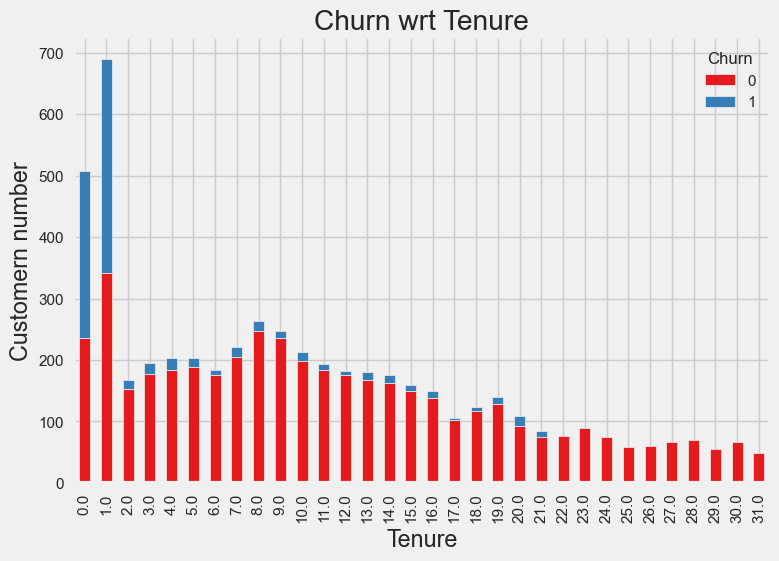

In [139]:
fig = pd.crosstab(df["Tenure"], df["Churn"])
fig.plot(kind = 'bar', stacked = 'true', title = "Churn wrt Tenure")
plt.xlabel('Tenure')
plt.ylabel('Customern number')
plt.show()

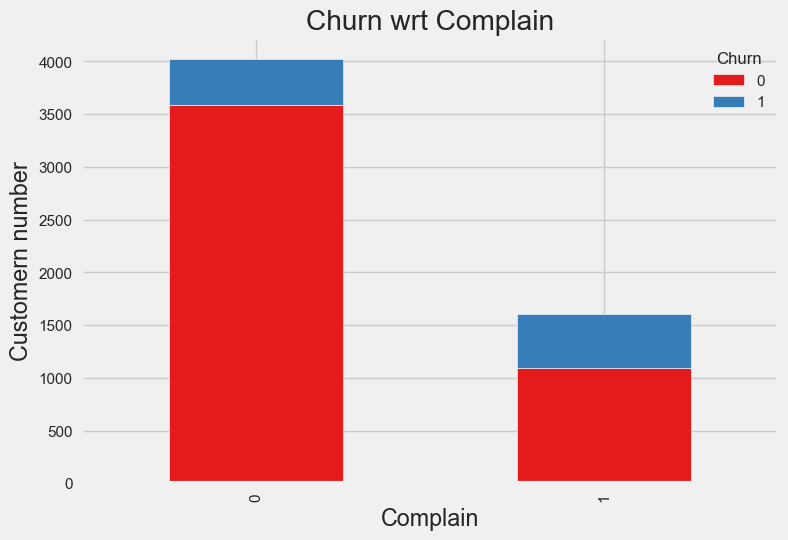

In [147]:
f = pd.crosstab(df["Complain"], df["Churn"])
f.plot(kind = 'bar', stacked = 'true', title = "Churn wrt Complain")
plt.xlabel('Complain')
plt.ylabel('Customern number')
plt.show()

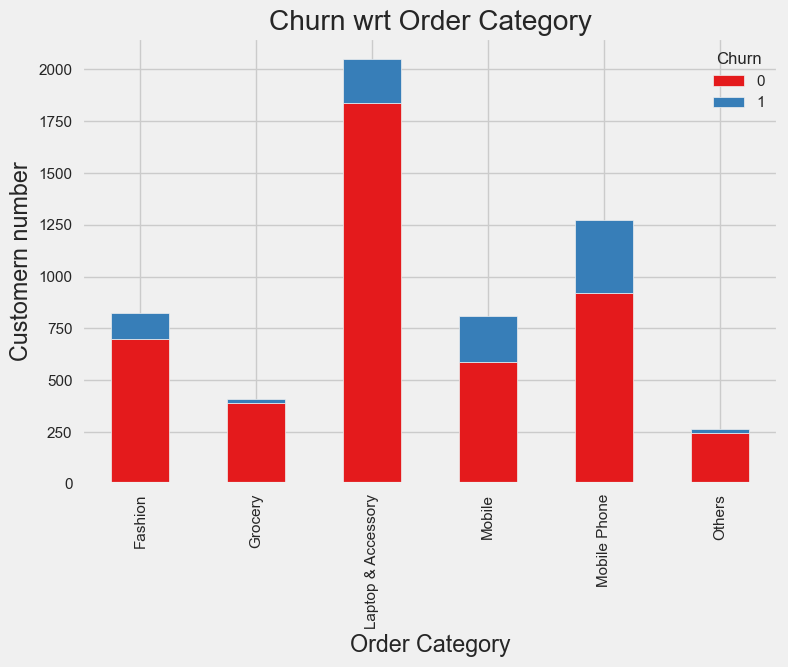

In [150]:
f = pd.crosstab(df["PreferedOrderCat"], df["Churn"])
f.plot(kind = 'bar', stacked = 'true', title = "Churn wrt Order Category")
plt.xlabel('Order Category')
plt.ylabel('Customern number')
plt.show()

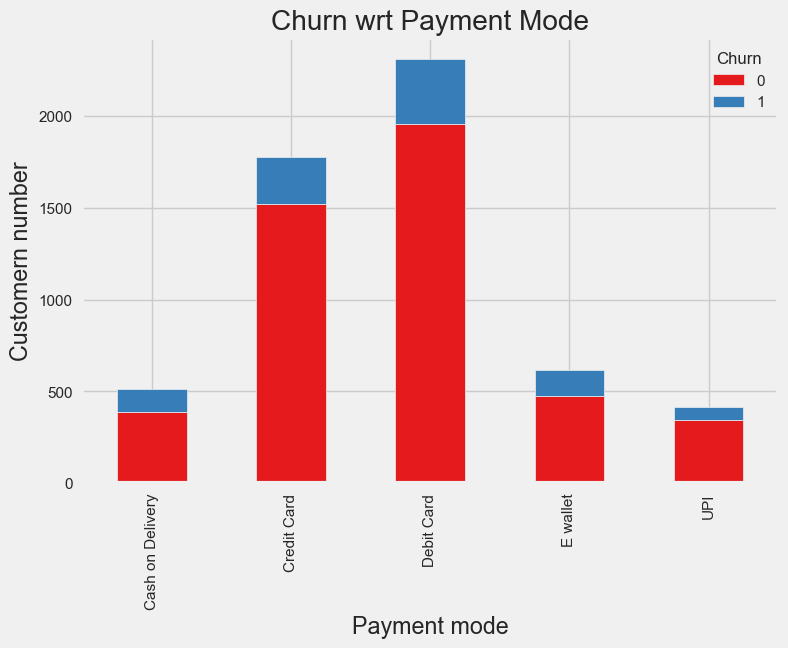

In [152]:
f = pd.crosstab(df["PreferredPaymentMode"], df["Churn"])
f.plot(kind = 'bar', stacked = 'true', title = "Churn wrt Payment Mode")
plt.xlabel('Payment mode')
plt.ylabel('Customern number')
plt.show()

#### Conclusion:

The results show XGBoost outperforms other models based on the custom metric(profit). 

From the models feature importance analysis the top features with impact on customer's churn probability are:

- The Tenure of the customer (Customers with low tenure < 2 months are more likely to churn).
- Complain (those customers with complains have higher churn rate than those without complain).
- The order category of the customers (the customers ordered Laptop & Accessory and others are more likely to churn)
- The preferred payment method (the customers used E wallet are more likely to churn)

#### Insight :

- Provide promotions to new customers with tenure < 2 months such as a Coupon so that customers can continue shopping in E-commerce. 
- Handle the complains more efficiently. Identify the problem and response to the customer with complains quickly.
- Send marketing emails or mails(with coupon) to the customers who made orders only in the category of Laptops & Accessories.
- Investigate E-wallet payment system to check if it is not easy to use.